
..........# Voici le projet de Python for Data Analysis de GUEGUEN Nicolas, n'hésitez pas à lire les commentaires pour suivre le cheminement de pensée

## I) On importe la libraire Pandas afin d'avoir un aperçu du jeu de données

In [1]:
import pandas as pd
df = pd.read_csv('./Desktop/ESILV/5eme_annee/Python_for_data_analysis/Projet/incident_event_log.csv')
df.head(5)


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


On remarque que certaines colonnes ont des valeurs non-renseignées "?", on va voir quelles colonnes ont de hautes proportions de valeurs non-recensées afin de nettoyer nos données.

## II) Nettoyage des données

### 1) S'occuper des données manquantes

On va chercher à appliquer la fonction is.null() à nos données, pour cela, je vais remplacer les "?"
par des nan grâce à la libraire numpy

In [2]:
import numpy as np

In [3]:
df.replace (to_replace = "?", value=np.nan, inplace= True )
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


On remarque le succès du remplacement des ? par des nan. Tâchons de voir leur porportion dans les colonnes.

In [4]:
taux_donnees_abs=(df.isnull().sum()/len(df))*100
taux_donnees_abs

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

On remarque qu'il y a quelques colonnes qui contiennent plus de 90% de données , je vais les supprimer pour alléger
le nombre de colonnes

In [5]:
for j in range(len(taux_donnees_abs)):
    if(taux_donnees_abs[j]>=90):
        df.drop(columns=[taux_donnees_abs.index[j]], inplace= True)

In [6]:
nouveau_taux=(df.isnull().sum()/len(df))*100
nouveau_taux

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
notify                      0.000000
c

On a bien supprimé les colonnes susdites.

### 2) Objet de l'étude/conversion dates-durées

Ici l'objet de l'étude est de déterminer des corrélations entre la durée nécéssaire à la gestion d'un incident 
en fonction des autres éléments. Pour chaque évènement, je considèrerai la date de départ comme étant opened_at.

Pour calculer ces durées, je va donc chercher à calculer des durées entre deux dates et ajouter une colonne possédant cette valeur.

In [7]:
from datetime import datetime
df['sys_updated_at']=pd.to_datetime(df['sys_updated_at'])
df['closed_at']=pd.to_datetime(df['closed_at'])
df['duree']=(df['closed_at']-df['sys_updated_at']).astype('timedelta64[m]')



In [8]:
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,duree
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,92797.0
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,92347.0
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,92191.0
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,0.0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,2016-06-03 10:00:00,137103.0


Note : J'aurais pu convertir la différence en secondes, en heures ou même en jours mais on préfère convertir cette
    différence en minute au vu des délais pouvant être très courts (ouvert et résolu (mais pas fermé certes) le même
    jour) jusqu'à des process longs de plusieurs mois. Ainsi, convertir en heure aurait aussi pu être valable.
    Le choix a été fait sur minutes pour favoriser la précision sur les délais courts.

### 3) Gérer les variables catégorielles

Regardons les types de variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 32 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null object
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null datetime64[ns]
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory                141601 non-nu

(Note : suite à des soucis rencontrés plus loin dans l'étude, je vais décider de remplacer maintenant les valeurs NàN des colonnes de type object par la valeur la plus présente au sein de ces colonnes. Cette modification pourrait entraîner des problèmes de sur-représentation de certaines valeurs mais j'espère que les taux relativement faibles de NàN dans ces colonnes permettront d'éviter cet écueil)

In [10]:
cols_obj=df.select_dtypes(include=['object']).copy()
for j in cols_obj.columns :
    df.fillna("ex.na", inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 32 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null datetime64[ns]
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-

Beaucoup de variables sont de type "object" difficiles à traiter en tant que telles. Des variables ont également
beaucoup d'éléments différents en leur sein. Je vais donc supprimer les colonnes qui portent des informations ne paraissant pas utiles (comme number, closed_code ou notify par exemple) puis chercher à transformer les valeurs de variables pertinentes en entier (même si faire ça risque de créer une relation d'ordre non-souhaitée)

In [12]:
for j in df.columns:
        if ((j!="impact")and(j!="urgency")and(j!="priority")and(j!="category")and(j!="contact_type")and(j!="incident_state")and(j!="subcategory")and(j!="location")and(j!="u_symptom")and(j!="duree")):
            df.drop(columns=[j], inplace= True)


In [13]:
cols = ["impact", "urgency", "priority", "category", "subcategory", "location", "u_symptom"]
for j in cols:
    lab = df[j].astype('category').cat.categories.tolist()
    replace_map = {j : {k: v for k,v in zip(lab,list(range(1,len(lab)+1)))}}
    df.replace(replace_map, inplace=True)

In [14]:
df = pd.get_dummies(df, columns=['contact_type'], prefix = ['contact_type'])
df = pd.get_dummies(df, columns=['incident_state'], prefix = ['incident_state'])

# III) Séparation jeu de test et jeu d'entraînement

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
X=df.loc[:, df.columns != 'duree']
Y=df['duree']
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y)

X_tr.shape, X_te.shape, Y_tr.shape, Y_te.shape

((106284, 21), (35428, 21), (106284,), (35428,))

J'appelle le module sklearn et train_test_split qui sépare aléatoirement 3/4 du jeu de données en train et le reste
en test

# IV) Utilisation d'algorithmes

### 1) RandomForest

In [17]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest(arbres):
    alg=RandomForestRegressor(n_estimators=arbres)
    modele=alg.fit(X_tr, Y_tr)
    score=modele.score(X_te, Y_te)
    return score

On teste avec plusieurs valeurs de nombre d'arbres

In [18]:
ResultForest=[]
ResultForest.append(RandomForest(10))
ResultForest.append(RandomForest(25))
ResultForest.append(RandomForest(50))
ResultForest.append(RandomForest(100))
ResultForest.append(RandomForest(250)); ResultForest.append(RandomForest(500)); ResultForest.append(RandomForest(1000))
print(ResultForest)

[0.21999487389578787, 0.22739379188707132, 0.23356273451894938, 0.23585495368731246, 0.23594119094744423, 0.2365948697526109, 0.23667134862431338]


On affiche les résultats sur un graphique grâce à la librairie matplotlib

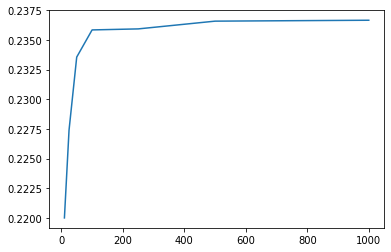

In [21]:
from matplotlib import pyplot
abcisse=[10, 25, 50, 100, 250, 500, 1000]
pyplot.plot(abcisse,ResultForest)
pyplot.show()

In [ ]:
matplotlib.pyplot.show()